In [3]:
### Install Geopandas
!pip install --upgrade geopandas

In [4]:
## import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

In [5]:
## Mount google drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the shapefile
# The shapefile includes 3934 locations, half the locations were obtained from the flood inventory while the other half was generated randomly.
# Flooded = 0 indicates not flooded location while Flooded = 1 indicates flooded location
## Every location has values for the 11 flood predictory features.
df=gpd.read_file("/content/drive/MyDrive/Research/Factor_data/new_landslide_data/landslide_points_new.shp")
df.head()
df.tail()

,label,Elevation,Slope,Aspect,Curvature,TWI,Dist_Roads,Dist_River,Rainfall,geometry
935,0,5169,4.194566,270.000000,2.121214,7.936643,0.018014,0.141131,2.253632,POINT (88.77123 28.00712)
936,0,4319,18.024210,72.632721,3.102201,2.218284,0.026909,0.237118,3.738126,POINT (88.21523 27.60837)
937,0,2743,31.268755,36.897747,6.309502,1.595760,0.037580,0.117431,4.492043,POINT (88.10501 27.37847)
938,0,4147,16.347734,214.125870,21.164442,2.832508,0.028537,0.046884,2.098044,POINT (88.65694 27.70705)
939,0,3257,49.972660,95.461349,17.227228,0.517851,0.036921,0.147414,4.252518,POINT (88.17293 27.40327)


In [7]:
print(df.describe().T)  #Values are already normalized in GIS before fitting

            count          mean           std           min          25%  \
Elevation   940.0  2.629910e+03  1.598699e+03  0.000000e+00  1394.750000   
Slope       936.0  3.052875e+01  1.166915e+01  1.047977e+00    23.198399   
Aspect      936.0  1.776792e+02  9.536898e+01 -0.000000e+00   103.321623   
Curvature   936.0  1.043426e+01  7.036305e+00  3.648469e-01     5.296441   
TWI         936.0  2.573399e+00  2.129130e+00  6.614735e-02     1.291568   
Dist_Roads  940.0 -2.353016e+21  8.637804e+21 -3.402823e+22     0.010441   
Dist_River  940.0 -7.203849e+21  1.390844e+22 -3.402823e+22     0.005274   
Rainfall    937.0  3.712966e+00  1.021466e+00  1.643142e+00     2.823535   

                    50%          75%          max  
Elevation   1995.000000  3982.500000  7959.000000  
Slope         30.786132    38.236068    67.984337  
Aspect       170.215195   253.925568   358.736603  
Curvature      8.943657    14.188594    47.881390  
TWI            1.858995     2.885223    11.118965  
Dis

In [8]:
# Check if there is null values
print(df.isnull().sum())
#df = df.dropna()

label         0
Elevation     0
Slope         4
Aspect        4
Curvature     4
TWI           4
Dist_Roads    0
Dist_River    0
Rainfall      3
geometry      0
dtype: int64


In [9]:
print("Null values before cleaning:")
print(df.isnull().sum())

# Remove rows with null values
df_clean = df.dropna()

# Check null values after cleaning
print("\nNull values after cleaning:")
print(df_clean.isnull().sum())

Null values before cleaning:
label         0
Elevation     0
Slope         4
Aspect        4
Curvature     4
TWI           4
Dist_Roads    0
Dist_River    0
Rainfall      3
geometry      0
dtype: int64

Null values after cleaning:
label         0
Elevation     0
Slope         0
Aspect        0
Curvature     0
TWI           0
Dist_Roads    0
Dist_River    0
Rainfall      0
geometry      0
dtype: int64


In [10]:
df = df.rename(columns={'label':'Label'})
print(df.dtypes)

Label           object
Elevation        int64
Slope          float64
Aspect         float64
Curvature      float64
TWI            float64
Dist_Roads     float64
Dist_River     float64
Rainfall       float64
geometry      geometry
dtype: object


<Axes: xlabel='Label', ylabel='count'>

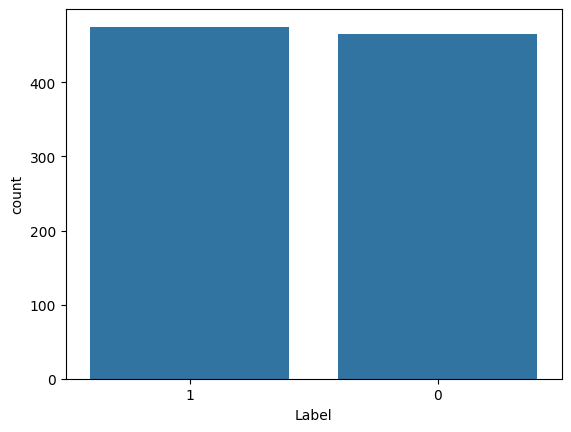

In [11]:
#Understand the data
# The dataset includes the same number of flooded and not flooded locations
sns.countplot(x="Label", data=df) #0 - Notflooded   1 - Flooded

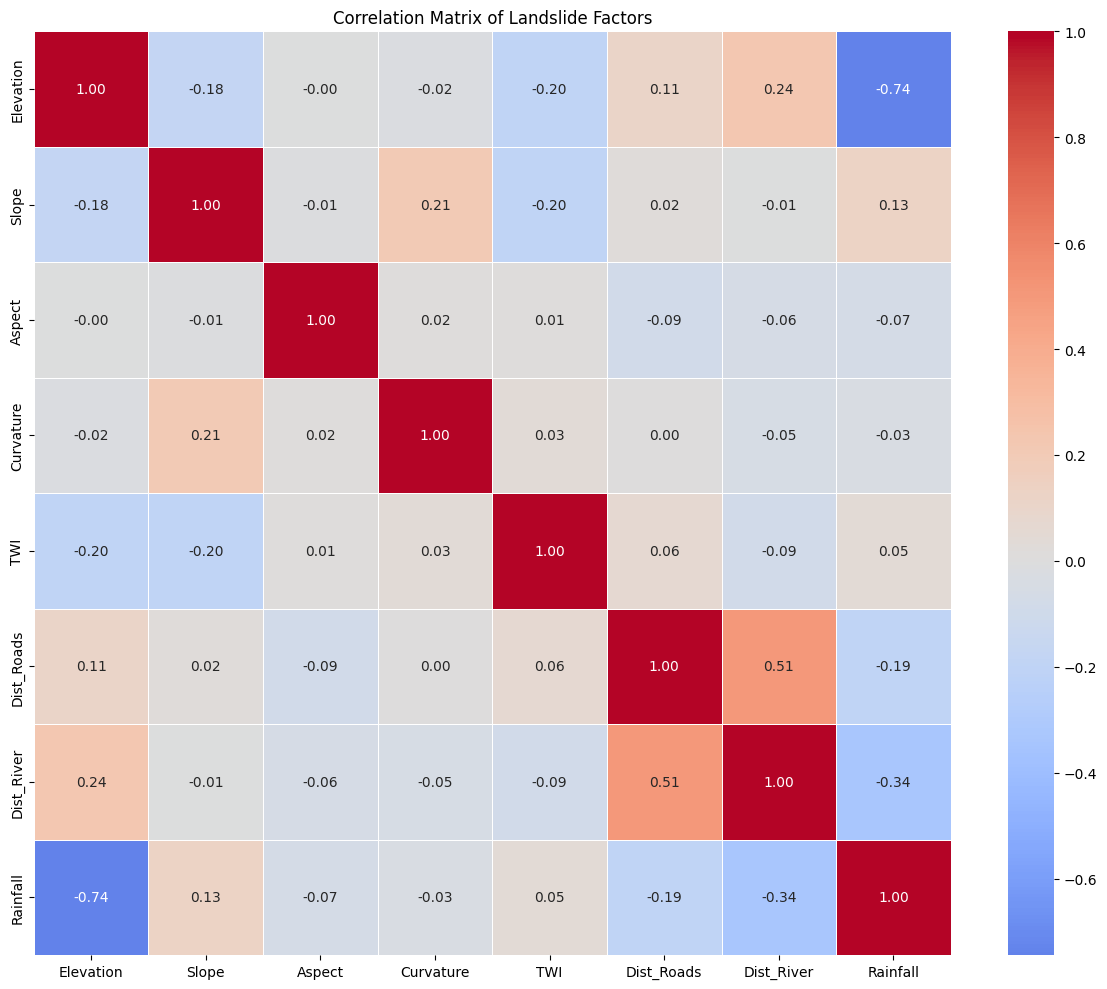

In [12]:
# Show the correlation matrix for the dataset
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
corrMatrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, annot=True, linewidths=0.5, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Landslide Factors')
plt.tight_layout()
plt.show()

In [13]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Label"].values


In [14]:
#Define the independent variables.
X = df.drop(labels = ["Label",'geometry'], axis=1)
features_list = list(X.columns)  #List features so we can rank them later.
#from sklearn.preprocessing import normalize
# Only needed if the data was not normalized
#X = normalize(X, axis=1)

In [15]:
# the independent variables
X

,Elevation,Slope,Aspect,Curvature,TWI,Dist_Roads,Dist_River,Rainfall
0,1744,18.874947,353.885651,5.862309,1.763498,0.026087,0.005953,5.039266
1,1678,30.365263,34.014854,7.511114,1.631544,0.028777,0.004042,5.039266
2,536,37.498302,126.209045,10.397345,9.081343,0.004218,0.019351,4.739767
3,546,49.145763,125.028694,29.511494,8.671655,0.004461,0.019614,4.739767
4,1477,18.796925,323.950958,13.574903,1.767942,0.026576,0.010973,4.832981
...,...,...,...,...,...,...,...,...
935,5169,4.194566,270.000000,2.121214,7.936643,0.018014,0.141131,2.253632
936,4319,18.024210,72.632721,3.102201,2.218284,0.026909,0.237118,3.738126
937,2743,31.268755,36.897747,6.309502,1.595760,0.037580,0.117431,4.492043
938,4147,16.347734,214.125870,21.164442,2.832508,0.028537,0.046884,2.098044


In [16]:
# the dependent variable
Y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [17]:
#Split data into train, validation and test to verify accuracy after fitting the model.
# Firstly split the data into train_validation and test datasets then split the train_validation dataset into train and validation datasets.
# The training dataset is used to train the model, the validation dataset is used for hyperparamter tuning and the testing dataset is used to test the model.
# It is recommended to test the model with a data that the model hasn't seen in the training process
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True, random_state=42)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,shuffle=True, random_state=42)

In [19]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)

In [20]:
# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Model prediction
prediction = model.predict(X_test)

In [22]:
# Prediction are 1 (Flooded) and 0 (Not flooded)
prediction

array(['0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1',
       '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1',
       '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1',
       '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1',
       '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1',
       '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1

In [23]:
# Convert string labels to numbers
y_test_numeric = y_test.astype(int)

# Simple ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_proba)
auc_score = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Landslide Model')
plt.legend()
plt.grid(True)
plt.show()

print(f"Model AUC Score: {auc_score:.3f}")


NameError: name 'roc_curve' is not defined

In [24]:
# In order to map the flood susceptibility, we need to predict the flood susceptibility (probability between 0 and 1)
prediction_prob=model.predict_proba(X_test)

In [25]:
# The probability of being not flooded and flooded for every location ( Their summation equals 1)
prediction_prob

array([[0.88, 0.12],
       [0.28, 0.72],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.58, 0.42],
       [1.  , 0.  ],
       [0.09, 0.91],
       [0.16, 0.84],
       [0.17, 0.83],
       [0.15, 0.85],
       [0.36, 0.64],
       [0.23, 0.77],
       [0.19, 0.81],
       [0.99, 0.01],
       [0.92, 0.08],
       [0.59, 0.41],
       [0.1 , 0.9 ],
       [0.94, 0.06],
       [0.22, 0.78],
       [0.59, 0.41],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.08, 0.92],
       [0.58, 0.42],
       [0.17, 0.83],
       [0.19, 0.81],
       [0.38, 0.62],
       [0.13, 0.87],
       [0.2 , 0.8 ],
       [0.08, 0.92],
       [0.55, 0.45],
       [0.03, 0.97],
       [0.97, 0.03],
       [0.13, 0.87],
       [0.36, 0.64],
       [0.58, 0.42],
       [0.5 , 0.5 ],
       [0.74, 0.26],
       [0.26, 0.74],
       [0.23, 0.77],
       [0.69, 0.31],
       [0.87, 0.13],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.14, 0.86],
       [0.25, 0.75],
       [0.2 , 0.8 ],
       [0.42,

In [26]:
ls=prediction_prob[:,1]
ls.shape

(188,)

In [27]:
# As flood susceptibility is classification problem (flooded or not flooded), we can calculate some additional performance indices
from sklearn.metrics import classification_report
target_names=["Not Landslide","Landslide"]
print(classification_report(y_test, prediction, target_names=target_names))

               precision    recall  f1-score   support

Not Landslide       0.91      0.80      0.85        89
    Landslide       0.84      0.93      0.88        99

     accuracy                           0.87       188
    macro avg       0.87      0.86      0.87       188
 weighted avg       0.87      0.87      0.87       188



In [28]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, prediction))

0.7316126084970306


In [29]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[71 18]
 [ 7 92]]


In [30]:
#importances = list(model_RF.feature_importances_)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Elevation     0.369957
Rainfall      0.164637
Slope         0.101907
Dist_Roads    0.086513
Dist_River    0.078793
TWI           0.075581
Aspect        0.064578
Curvature     0.058034
dtype: float64


<Axes: >

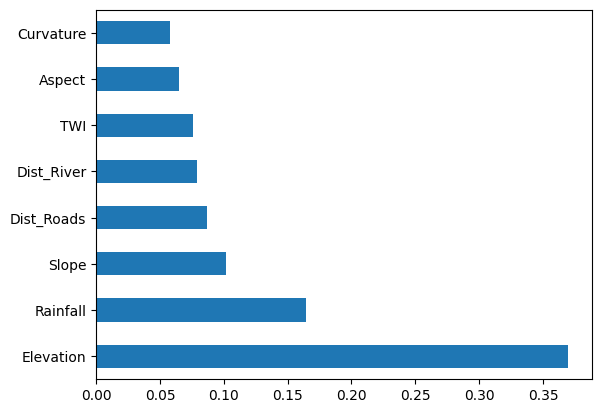

In [31]:
feature_imp.plot.barh()

In [32]:
df=gpd.read_file("/content/drive/MyDrive/Research/sikki_for_use_after/sikkim_test1.shp")

In [33]:
df.tail()

,FID,Elevation,Slope,Aspect,Curvature,TWI,Dist_Roads,Dist_River,Rainfall,geometry
278,295,2689,40.675472,267.841003,4.341777,2.922957,0.022754347,0.06174191,2.642564,POINT (88.62679 27.63296)
279,296,552,15.270849,290.839172,10.768118,11.321401,0.025230508,0.049355783,3.886656,POINT (88.47696 27.35486)
280,297,1917,33.697403,320.968292,20.254299,1.502302,0.07069855,0.028911382,3.415752,POINT (88.41697 27.55351)
281,298,4707,22.114269,185.170975,10.259703,8.155795,0.056159724,0.11897507,2.699172,POINT (88.32866 27.86974)
282,299,5785,NaN,NaN,NaN,NaN,0.053415023,0.10701073,2.329357,POINT (88.20656 27.95566)


In [35]:
X_hotspot0= df.drop(labels = ["geometry",'FID'], axis=1)
X_hotspot0.head()

,Elevation,Slope,Aspect,Curvature,TWI,Dist_Roads,Dist_River,Rainfall
0,1619,32.349388,48.355965,21.638662,5.217280,-3.402823e+38,-3.402823e+38,4.402229
1,3329,39.787426,7.550389,13.139572,0.874913,0.011062416,0.27063176,2.732113
2,2924,44.876678,237.554245,37.754128,1.389595,0.0035034297,0.023730831,3.037205
3,3929,18.425974,22.603764,6.516585,2.482432,0.056123503,0.039087866,2.866511
4,3910,28.859726,310.255951,16.402859,1.980297,0.030471962,-3.402823e+38,2.054487


In [36]:
cols=X.columns
cols

Index(['Elevation', 'Slope', 'Aspect', 'Curvature', 'TWI', 'Dist_Roads',
       'Dist_River', 'Rainfall'],
      dtype='object')

In [37]:
X_hotspot0=X_hotspot0[cols]
X_hotspot0.head()

,Elevation,Slope,Aspect,Curvature,TWI,Dist_Roads,Dist_River,Rainfall
0,1619,32.349388,48.355965,21.638662,5.217280,-3.402823e+38,-3.402823e+38,4.402229
1,3329,39.787426,7.550389,13.139572,0.874913,0.011062416,0.27063176,2.732113
2,2924,44.876678,237.554245,37.754128,1.389595,0.0035034297,0.023730831,3.037205
3,3929,18.425974,22.603764,6.516585,2.482432,0.056123503,0.039087866,2.866511
4,3910,28.859726,310.255951,16.402859,1.980297,0.030471962,-3.402823e+38,2.054487


In [38]:
print(X_hotspot0.isnull().sum())

Elevation     0
Slope         5
Aspect        5
Curvature     6
TWI           5
Dist_Roads    0
Dist_River    0
Rainfall      3
dtype: int64


In [39]:
# Remove rows with null values
df_clean = df.dropna()

# Check null values after cleaning
print("\nNull values after cleaning:")
print(df_clean.isnull().sum())


Null values after cleaning:
FID           0
Elevation     0
Slope         0
Aspect        0
Curvature     0
TWI           0
Dist_Roads    0
Dist_River    0
Rainfall      0
geometry      0
dtype: int64


In [40]:
X_hotspot0 = X_hotspot0.dropna()

In [41]:
df=df.dropna()

In [42]:
prediction_prob=model.predict_proba(X_hotspot0)

In [43]:
prediction_prob

array([[0.29, 0.71],
       [0.85, 0.15],
       [0.81, 0.19],
       [0.88, 0.12],
       [0.89, 0.11],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.23, 0.77],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.45, 0.55],
       [0.93, 0.07],
       [0.05, 0.95],
       [0.94, 0.06],
       [0.88, 0.12],
       [0.92, 0.08],
       [0.93, 0.07],
       [0.81, 0.19],
       [0.91, 0.09],
       [0.78, 0.22],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.67, 0.33],
       [0.32, 0.68],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.72, 0.28],
       [0.85, 0.15],
       [0.23, 0.77],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.47, 0.53],
       [0.65, 0.35],
       [0.85, 0.15],
       [0.57, 0.43],
       [0.95, 0.05],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.91, 0.09],
       [0.56, 0.44],
       [0.98, 0.02],
       [0.67, 0.33],
       [0.65, 0.35],
       [0.76,

In [44]:
ls_hotspot0=prediction_prob[:,1]
ls_hotspot0

array([0.71, 0.15, 0.19, 0.12, 0.11, 0.9 , 0.21, 0.03, 0.06, 0.77, 0.05,
       0.01, 0.05, 0.55, 0.07, 0.95, 0.06, 0.12, 0.08, 0.07, 0.19, 0.09,
       0.22, 0.03, 0.1 , 0.33, 0.68, 0.02, 0.02, 0.04, 0.28, 0.15, 0.77,
       0.  , 0.  , 0.53, 0.35, 0.15, 0.43, 0.05, 0.03, 0.05, 0.09, 0.44,
       0.02, 0.33, 0.35, 0.24, 0.18, 0.02, 0.04, 0.05, 0.75, 0.75, 0.  ,
       0.06, 0.15, 0.12, 0.81, 0.76, 0.79, 0.93, 0.02, 0.76, 0.02, 0.08,
       0.49, 0.09, 0.42, 0.64, 0.03, 0.15, 0.26, 0.07, 0.02, 0.05, 0.01,
       0.1 , 0.07, 0.28, 0.86, 0.18, 0.03, 0.04, 0.87, 0.94, 0.07, 0.15,
       0.04, 0.06, 0.8 , 0.03, 0.03, 0.11, 0.04, 0.24, 0.04, 0.41, 0.09,
       0.  , 0.46, 0.51, 0.01, 0.07, 0.24, 0.11, 0.03, 0.43, 0.64, 0.01,
       0.02, 0.25, 0.68, 0.23, 0.02, 0.06, 0.05, 0.11, 0.47, 0.14, 0.01,
       0.06, 0.65, 0.31, 0.18, 0.05, 0.11, 0.29, 0.42, 0.85, 0.1 , 0.61,
       0.76, 0.33, 0.03, 0.07, 0.07, 0.16, 0.04, 0.04, 0.03, 0.05, 0.11,
       0.08, 0.08, 0.73, 0.03, 0.6 , 0.05, 0.64, 0.

In [45]:
df['LSM']=ls_hotspot0
df.head()

,FID,Elevation,Slope,Aspect,Curvature,TWI,Dist_Roads,Dist_River,Rainfall,geometry,LSM
0,0,1619,32.349388,48.355965,21.638662,5.217280,-3.402823e+38,-3.402823e+38,4.402229,POINT (88.76664 27.22493),0.71
1,1,3329,39.787426,7.550389,13.139572,0.874913,0.011062416,0.27063176,2.732113,POINT (88.70063 27.42836),0.15
2,2,2924,44.876678,237.554245,37.754128,1.389595,0.0035034297,0.023730831,3.037205,POINT (88.4789 27.60265),0.19
3,3,3929,18.425974,22.603764,6.516585,2.482432,0.056123503,0.039087866,2.866511,POINT (88.50558 27.75938),0.12
4,4,3910,28.859726,310.255951,16.402859,1.980297,0.030471962,-3.402823e+38,2.054487,POINT (88.77752 27.72045),0.11


LSM range: 0.000 to 0.950


/tmp/ipython-input-1907198284.py:60: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly = sikkim_utm.unary_union


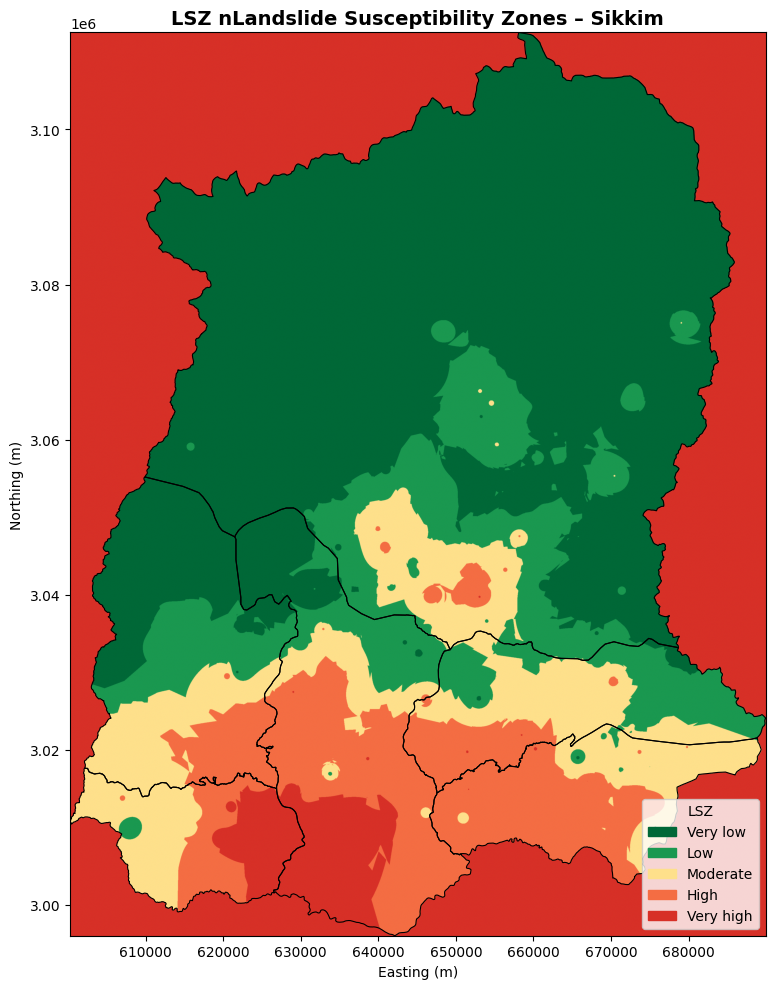

In [46]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from shapely.geometry import Point
from scipy.spatial import cKDTree

# ---------------------------------------------------
# 1. READ DATA & PROJECT TO UTM (METERS)
# ---------------------------------------------------

# df already exists and has a column 'LSM'

# Sikkim boundary shapefile (CHANGE THIS PATH!)
sikkim_path = "/content/drive/MyDrive/Research/Sikkim_shapefile/sikkim.shp"
sikkim = gpd.read_file(sikkim_path)

# Work in UTM zone 45N (meters)
sikkim_utm = sikkim.to_crs("EPSG:32645")
df_utm = df.to_crs("EPSG:32645")

# Normalise LSM to 0–1
lsm_min = df_utm["LSM"].min()
lsm_max = df_utm["LSM"].max()
df_utm["LSM_norm"] = (df_utm["LSM"] - lsm_min) / (lsm_max - lsm_min)
print(f"LSM range: {lsm_min:.3f} to {lsm_max:.3f}")

# ---------------------------------------------------
# 2. BUILD AN IDW RASTER OVER SIKKIM
# ---------------------------------------------------

# Grid resolution in meters (smaller = more detail, slower)
res = 30   # try 250 m; you can change to 200 or 300

minx, miny, maxx, maxy = sikkim_utm.total_bounds
xs = np.arange(minx, maxx, res)
ys = np.arange(miny, maxy, res)
grid_x, grid_y = np.meshgrid(xs, ys)

# Point coordinates and values
coords = np.vstack((df_utm.geometry.x, df_utm.geometry.y)).T
values = df_utm["LSM_norm"].values

# KDTree for fast nearest-neighbour search
tree = cKDTree(coords)

# For each grid cell, look at k nearest points
k = 8
dist, idx = tree.query(np.c_[grid_x.ravel(), grid_y.ravel()], k=k)

# IDW weights (inverse distance)
weights = 1.0 / (dist + 1e-12)
idw_vals = np.sum(weights * values[idx], axis=1) / np.sum(weights, axis=1)

# ---------------------------------------------------
# 3. MASK RASTER OUTSIDE THE SIKKIM BORDER
# ---------------------------------------------------

poly = sikkim_utm.unary_union

flat_x = grid_x.ravel()
flat_y = grid_y.ravel()
inside = np.array([poly.contains(Point(x, y)) for x, y in zip(flat_x, flat_y)])

idw_vals[~inside] = np.nan
idw_raster = idw_vals.reshape(grid_x.shape)

# ---------------------------------------------------
# 4. CLASSIFY INTO SUSCEPTIBILITY ZONES
# ---------------------------------------------------
# Class breaks (you can tune these)
# 0.00–0.20 Very low
# 0.20–0.40 Low
# 0.40–0.60 Moderate
# 0.60–0.80 High
# 0.80–1.00 Very high

bins = [0.20, 0.40, 0.60, 0.80]
classes = np.digitize(idw_raster, bins=bins)

# ---------------------------------------------------
# 5. PLOT – FULL SIKKIM WITH BORDER & LEGEND
# ---------------------------------------------------

# Color order: Very low (dark green) → Very high (red)
cmap = ListedColormap([
    "#006837",   # 0 Very low
    "#1a9850",   # 1 Low
    "#fee08b",   # 2 Moderate (yellow)
    "#f46d43",   # 3 High (orange)
    "#d73027",   # 4 Very high (red)
])

fig, ax = plt.subplots(figsize=(8, 10))

# Show raster
im = ax.imshow(
    classes,
    cmap=cmap,
    extent=[minx, maxx, miny, maxy],
    origin="lower"
)

# Draw Sikkim border on top
sikkim_utm.boundary.plot(ax=ax, edgecolor="black", linewidth=0.8)

# Build custom legend for classes
labels = ["Very low", "Low", "Moderate", "High", "Very high"]
patches = [Patch(color=cmap(i), label=labels[i]) for i in range(len(labels))]
legend = ax.legend(
    handles=patches,
    title="LSZ",
    loc="lower right",
    frameon=True
)

# Titles and axis labels
ax.set_title("LSZ nLandslide Susceptibility Zones – Sikkim", fontsize=14, fontweight="bold")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_aspect("equal")

plt.tight_layout()
plt.show()


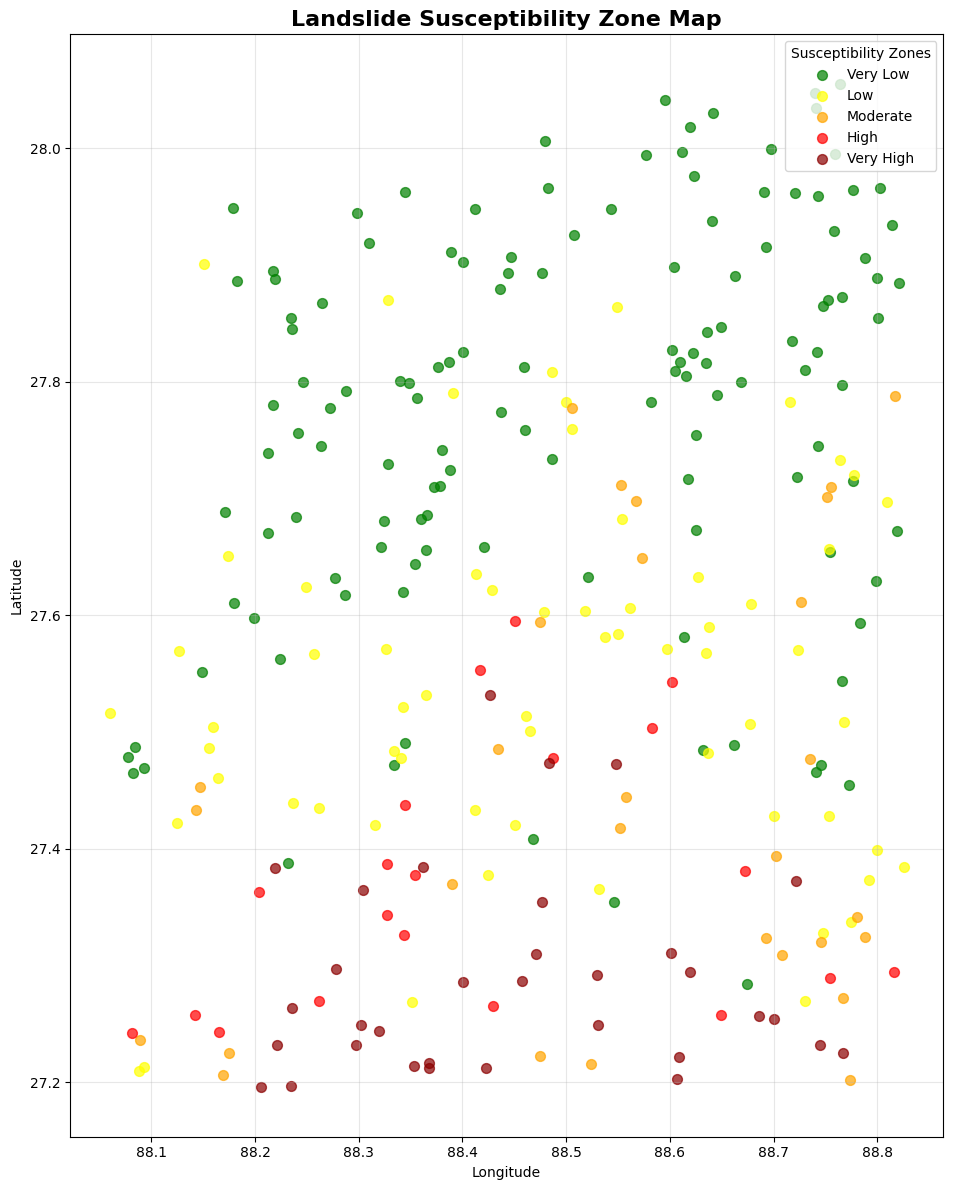

LANDSLIDE SUSCEPTIBILITY ANALYSIS RESULTS

Zone Distribution:
Very Low: 132 points (47.7%)
Low: 63 points (22.7%)
Moderate: 29 points (10.5%)
High: 20 points (7.2%)
Very High: 33 points (11.9%)

LSM Value Statistics:
Minimum: 0.000
Maximum: 0.950
Mean: 0.239
Standard Deviation: 0.267


In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Convert to GeoDataFrame if not already
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Define susceptibility classification
def classify_susceptibility(lsm):
    if lsm >= 0.7:
        return 'Very High'
    elif lsm >= 0.5:
        return 'High'
    elif lsm >= 0.3:
        return 'Moderate'
    elif lsm >= 0.1:
        return 'Low'
    else:
        return 'Very Low'

# Apply classification
gdf['Susceptibility_Zone'] = gdf['LSM'].apply(classify_susceptibility)

# Define colors and order for zones
zone_order = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
colors = ['green', 'yellow', 'orange', 'red', 'darkred']

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Plot by susceptibility zone
for zone, color in zip(zone_order, colors):
    subset = gdf[gdf['Susceptibility_Zone'] == zone]
    if not subset.empty:
        subset.plot(ax=ax, color=color, label=zone, markersize=50, alpha=0.7)

# Customize the map
ax.set_title('Landslide Susceptibility Zone Map', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(title='Susceptibility Zones', loc='upper right')
ax.grid(True, alpha=0.3)

# Add background (optional - if you have base map)
# import contextily as ctx
# ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*50)
print("LANDSLIDE SUSCEPTIBILITY ANALYSIS RESULTS")
print("="*50)
print("\nZone Distribution:")
zone_stats = gdf['Susceptibility_Zone'].value_counts().reindex(zone_order)
for zone, count in zone_stats.items():
    percentage = (count / len(gdf)) * 100
    print(f"{zone}: {count} points ({percentage:.1f}%)")

print(f"\nLSM Value Statistics:")
print(f"Minimum: {gdf['LSM'].min():.3f}")
print(f"Maximum: {gdf['LSM'].max():.3f}")
print(f"Mean: {gdf['LSM'].mean():.3f}")
print(f"Standard Deviation: {gdf['LSM'].std():.3f}")

In [55]:
from google.colab import drive
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
from rasterio import features
from rasterio.transform import from_origin
from shapely.geometry import shape
import os



# Create output folder in Drive
output_folder = '/content/drive/MyDrive/Research/Factor_data/Landslide_Susceptibility'
os.makedirs(output_folder, exist_ok=True)

# Step 1: Convert DataFrame to GeoDataFrame (if not already)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Step 2: Create raster from points
print("Creating raster from points...")
bounds = gdf.total_bounds
x_min, y_min, x_max, y_max = bounds

# Set resolution (adjust based on your data density)
resolution = 0.001  # degrees
width = int((x_max - x_min) / resolution)
height = int((y_max - y_min) / resolution)

transform = from_origin(x_min, y_max, resolution, resolution)

# Create raster array
raster = np.zeros((height, width), dtype=np.float32)

# Rasterize LSM values
shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf.LSM))
burned_raster = features.rasterize(
    shapes=shapes,
    out_shape=raster.shape,
    transform=transform,
    fill=-9999,  # NoData value
    all_touched=True
)

# Step 3: Convert raster to vector (polygonize)
print("Converting raster to vector polygons...")
mask = burned_raster != -9999  # Mask NoData areas

# Polygonize the raster
results = (
    {'properties': {'LSM': v}, 'geometry': s}
    for i, (s, v) in enumerate(
        features.shapes(burned_raster, mask=mask, transform=transform)
    )
)

# Create GeoDataFrame from polygons
polygons = list(results)
vector_gdf = gpd.GeoDataFrame.from_features(polygons)

# Set CRS (coordinate reference system)
vector_gdf.crs = 'EPSG:4326'  # WGS84

# Step 4: Classify susceptibility zones
print("Classifying susceptibility zones...")
def classify_zone(lsm):
    if lsm >= 0.7:
        return 'Very High'
    elif lsm >= 0.5:
        return 'High'
    elif lsm >= 0.3:
        return 'Moderate'
    elif lsm >= 0.1:
        return 'Low'
    else:
        return 'Very Low'

vector_gdf['Zone'] = vector_gdf['LSM'].apply(classify_zone)
vector_gdf['Zone_Code'] = vector_gdf['LSM'].apply(
    lambda x: 5 if x >= 0.7 else 4 if x >= 0.5 else 3 if x >= 0.3 else 2 if x >= 0.1 else 1
)

# Step 5: Save as Shapefile
print("Saving Shapefile to Google Drive...")
shp_path = f'{output_folder}/landslide_susceptibility_zones.shp'
vector_gdf.to_file(shp_path)

print("✅ Shapefile saved successfully!")
print(f"📍 Location: {shp_path}")
print(f"📊 Total polygons: {len(vector_gdf)}")
print(f"🎯 Zone distribution:")
print(vector_gdf['Zone'].value_counts())

Creating raster from points...
Converting raster to vector polygons...
Classifying susceptibility zones...
Saving Shapefile to Google Drive...
✅ Shapefile saved successfully!
📍 Location: /content/drive/MyDrive/Research/Factor_data/Landslide_Susceptibility/landslide_susceptibility_zones.shp
📊 Total polygons: 275
🎯 Zone distribution:
Zone
Very Low     132
Low           62
Very High     32
Moderate      29
High          20
Name: count, dtype: int64


In [50]:
! pip install geocube

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 8.0 MB/s eta 0:00:00


In [51]:
import geocube
from geocube.api.core import make_geocube

geo_grid = make_geocube(
    vector_data=df,
    measurements=['LSM'],
    resolution=(-2, 2)
)

In [52]:
print("Your data info:")
print(f"Number of points: {len(df)}")
print(f"Coordinate system: {df.crs}")
print(f"Columns: {df.columns.tolist()}")

# Check the LSM values
print(f"LSM range: {df['LSM'].min():.3f} to {df['LSM'].max():.3f}")

Your data info:
Number of points: 277
Coordinate system: EPSG:4326
Columns: ['FID', 'Elevation', 'Slope', 'Aspect', 'Curvature', 'TWI', 'Dist_Roads', 'Dist_River', 'Rainfall', 'geometry', 'LSM', 'Susceptibility_Zone', 'x', 'y']
LSM range: 0.000 to 0.950


In [53]:
# Check where your points are located
print("Data bounds:")
print(f"Longitude: {df.geometry.bounds.minx.min():.3f} to {df.geometry.bounds.maxx.max():.3f}")
print(f"Latitude: {df.geometry.bounds.miny.min():.3f} to {df.geometry.bounds.maxy.max():.3f}")

print(f"\nLSM values: {df['LSM'].min():.3f} to {df['LSM'].max():.3f}")

Data bounds:
Longitude: 88.060 to 88.825
Latitude: 27.196 to 28.055

LSM values: 0.000 to 0.950


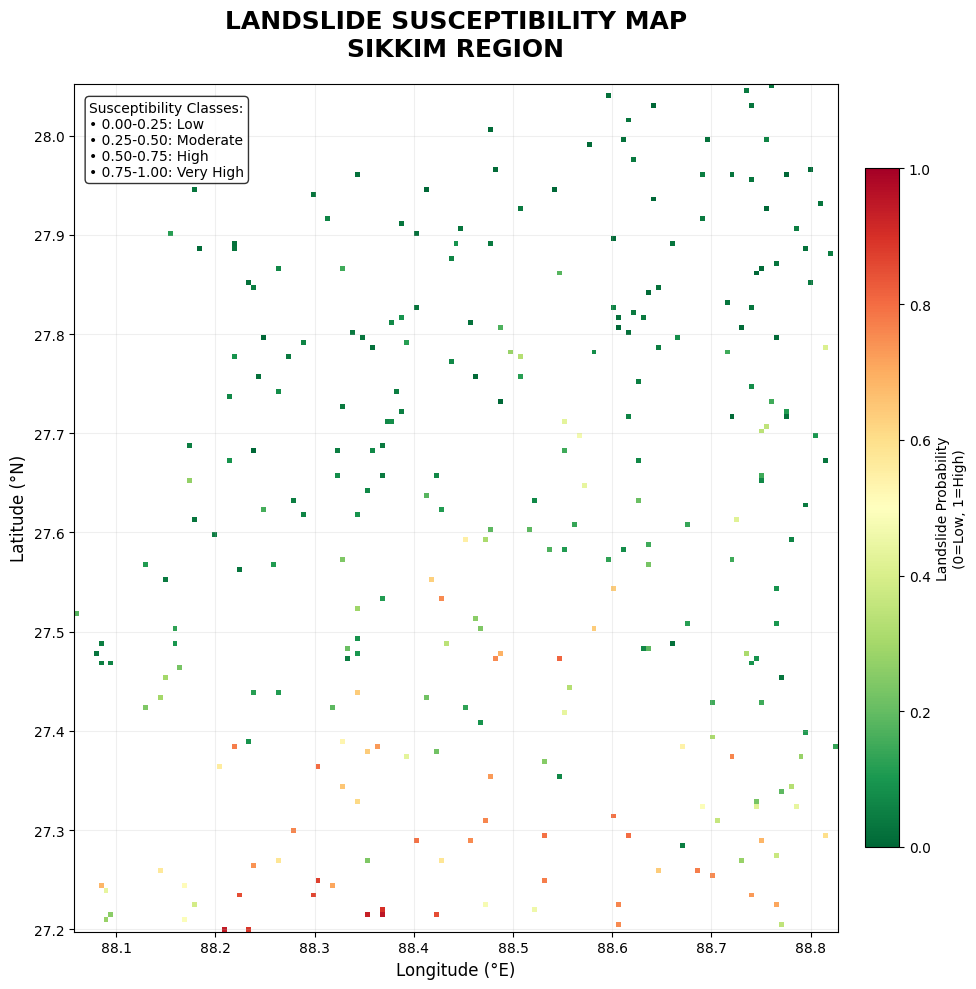

In [54]:
# High-quality professional map
geo_grid = make_geocube(vector_data=df, measurements=['LSM'], resolution=(-0.005, 0.005))

plt.figure(figsize=(14, 10))
im = plt.imshow(geo_grid.LSM,
                cmap='RdYlGn_r',
                vmin=0, vmax=1,
                extent=[geo_grid.x.min(), geo_grid.x.max(),
                        geo_grid.y.min(), geo_grid.y.max()])

plt.colorbar(im, label='Landslide Probability\n(0=Low, 1=High)',
             shrink=0.8, pad=0.02)
plt.title('LANDSLIDE SUSCEPTIBILITY MAP\nSIKKIM REGION',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Longitude (°E)', fontsize=12)
plt.ylabel('Latitude (°N)', fontsize=12)
plt.grid(True, alpha=0.2)

# Add susceptibility classes
plt.text(0.02, 0.98, 'Susceptibility Classes:\n• 0.00-0.25: Low\n• 0.25-0.50: Moderate\n• 0.50-0.75: High\n• 0.75-1.00: Very High',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         verticalalignment='top', fontsize=10)

plt.tight_layout()
plt.show()

LSM range: 0.000 to 0.950


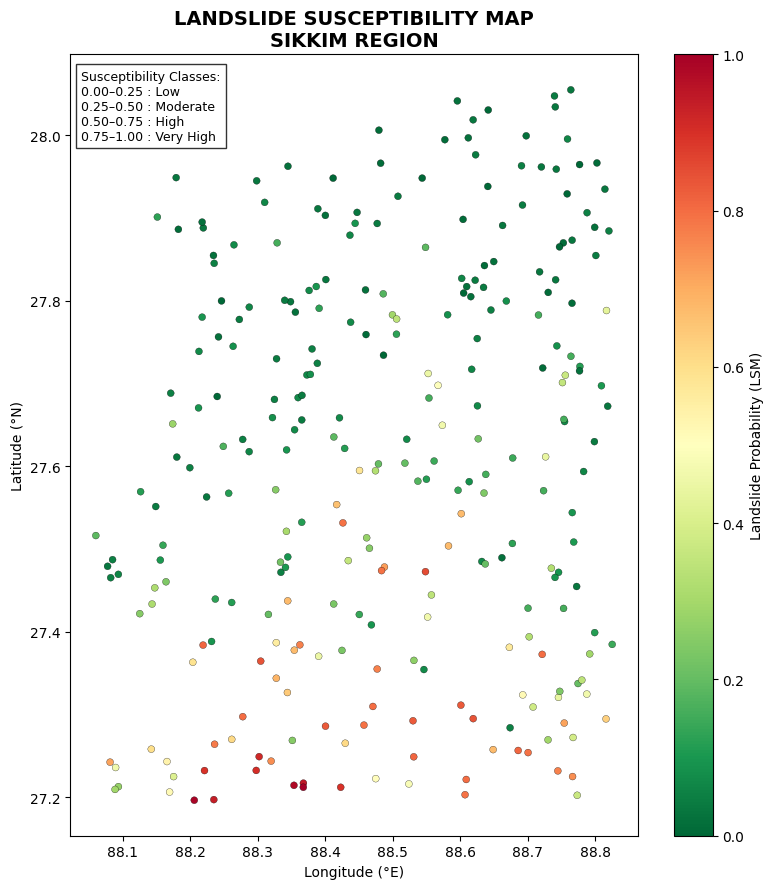

In [50]:
import matplotlib.pyplot as plt

# 1. Make sure data is in geographic coordinates (lon/lat)
df_ll = df.to_crs(epsg=4326)   # if df is already 4326, this just keeps it

# 2. Optionally normalise LSM to 0–1
lsm_min = df_ll["LSM"].min()
lsm_max = df_ll["LSM"].max()
df_ll["LSM_norm"] = (df_ll["LSM"] - lsm_min) / (lsm_max - lsm_min)
print(f"LSM range: {lsm_min:.3f} to {lsm_max:.3f}")

# 3. Plot points like your example figure
fig, ax = plt.subplots(figsize=(8, 9))

sc = ax.scatter(
    df_ll.geometry.x,
    df_ll.geometry.y,
    c=df_ll["LSM_norm"],      # or "LSM" if already 0–1
    cmap="RdYlGn_r",          # green = low, red = high
    vmin=0, vmax=1,
    s=25,                     # marker size; adjust 20–40
    edgecolor="k",
    linewidth=0.2
)

# 4. Colorbar & labels
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Landslide Probability (LSM)")

ax.set_xlabel("Longitude (°E)")
ax.set_ylabel("Latitude (°N)")

ax.set_title("LANDSLIDE SUSCEPTIBILITY MAP\nSIKKIM REGION", fontsize=14, fontweight="bold")

# 5. (Optional) add class legend as text box
text = (
    "Susceptibility Classes:\n"
    "0.00–0.25 : Low\n"
    "0.25–0.50 : Moderate\n"
    "0.50–0.75 : High\n"
    "0.75–1.00 : Very High"
)
ax.text(
    0.02, 0.98, text,
    transform=ax.transAxes,
    verticalalignment="top",
    fontsize=9,
    bbox=dict(facecolor="white", edgecolor="black", alpha=0.8)
)

plt.tight_layout()
plt.show()


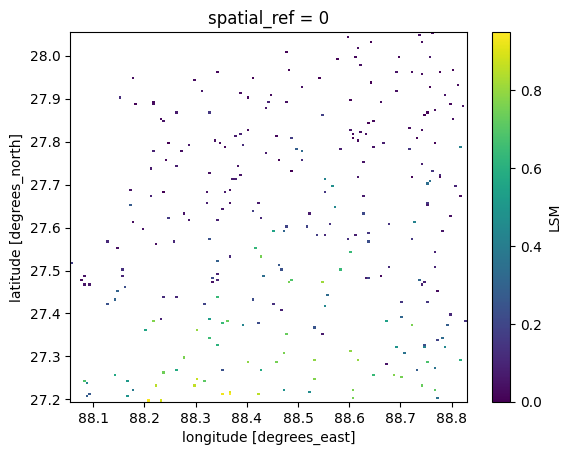

In [51]:
geo_grid.LSM.plot()

In [53]:
geo_grid.LSM.rio.to_raster("LSM.tif")